# Software Papers as Software Modules:<BR> Towards a Culture of Reusable Results

[Andreas Zeller](https://www.st.cs.uni-saarland.de/zeller/), CISPA / Saarland University

**Abstract.** _The future of scientific papers lies in the tight integration of traditional text with program code that can reproduce results on demand.  In this essay, I demonstrate that this integration also enables new reuse mechanisms: In the future, we could import and extend code from other papers just as we cite and extend their ideas._

Note: You can read this essay in multiple formats:

* [As a HTML page](http://htmlpreview.github.com?https://github.com/andreas-zeller/papers-as-modules/blob/master/Papers-as-Modules.html)

* [As a rendered notebook (Desktop browsers only)](https://github.com/andreas-zeller/papers-as-modules/blob/master/Papers-as-Modules.ipynb)

* [As a Jupyter Notebook (editable; Desktop browsers only; experimental)](https://mybinder.org/v2/gh/andreas-zeller/papers-as-modules.git/master?filepath=Papers-as-Modules.ipynb)

* [As source code on the Github project page](https://github.com/andreas-zeller/papers-as-modules/)

For feedback, use the [Github issue tracker](https://github.com/andreas-zeller/papers-as-modules/issues).  Comments are welcome!

## The Reproducibility Problem

The difficulty to reproduce, reuse, or extend scientific results has long been a common concern in scientific circles.  The problem is the more troubling as computer software is commonly used to evaluate or even embody research results - and while one may assume that computer software should be far easier to copy and extend, most scientific software is not in a shape that others could work with it.  Even in computer science, where the majority of all publications describe some software or algorithm, only a small minority of papers actually makes this software available to others.

Many reasons are cited against making software available, mostly the fear and cost of having to support some huge infrastructure.  And yes, if you have implemented, say, a symbolic analysis for FORTRAN-77, you will end up with a huge mess of code that will be hard to maintain.  On the other hand, there will be a few key contributions your analysis will have made - the key contributions you would like to detail in your paper, possibly with pseudocode.  The question is: Aren't these key contributions worthwhile not only to be read, but also to be _used_ and _reused_?

In this paper, I will argue that papers can be organized _together with the software they describe_; even further, I will argue for an ecosystem in which papers can not only cite the work they build upon, but actually _use, reuse, and extend existing work_ in the same way software modules use, reuse, and extend each other.  And the good news is: Almost all ingredients for this do already exist.

## Papers and Code: Better Together!

[_Jupyter Notebook_](http://jupyter.org) is a great tool to bring papers and code together.  A notebook document (or "notebook" for short) combines computer code (e.g. Python) and rich text elements (text, LaTeX math, figures, links) into a single document.  The included code can be executed at any time; its results (numbers, plots) are also included in the notebook.  Jupyter notebooks thus act as _executable papers_ in which analysis steps can be re-run at any time.

What does a Jupyter Notebook look like? Well, this document itself is a notebook, so I can integrate executable Python code.  For instance, I can define a Fibonacci function:

In [265]:
def fib(n):
    if n < 2:
        return n
    return fib(n - 2) + fib(n - 1)

and then evaluate it right within my document, with the result getting integrated into my document immediately.  Anything you see prefixed by `Out[...]:` is computed by the notebook processor.

In [266]:
fib(1)

1

I can also evaluate a list of results:

In [267]:
fibs = [fib(0), fib(1), fib(2), fib(3), fib(4), fib(5), fib(6), fib(7), fib(8), fib(9)]
fibs

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]

Python offers list comprehensions, so I can create such a list in a functional style:

In [268]:
fibs = [fib(i) for i in range(0, 10)]
fibs

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]

And I can also plot it, showing the exponential growth:

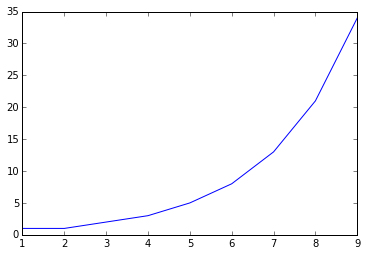

In [269]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd

ax = pd.Series(fibs).plot();
ax.set_xlim(1, 9);

The above plot is automatically integrated into my document; if I make any changes to the above definitions, it is automatically updated, too.  If I share my notebook with others (say, students), the recipients can toy with the implementation as they like.  This is made easier by the "literate programming" style in notebooks, which allows for a tight integration between text and code.  And did I mention that one can export notebooks into a multitude of formats, including PDF, HTML, slides, and Word?

The integration of text and code is widely seen as the future of the scientific paper.  For instance:

* [The scientific paper is obsolete.  What's next?](https://www.theatlantic.com/science/archive/2018/04/the-scientific-paper-is-obsolete/556676/)
* [A truly reproducible scientific paper?](https://medium.com/@bmpvieira/a-truly-reproducible-scientific-paper-5059b282ee9a)

However, not only can this integration be helpful for _individual papers_, it can also help to create a _culture of software contributions_ that others can _reuse and extend_ just as they now cite related work.  This is what this paper focuses upon.

## Papers as Modules

As a thought experiment, let us assume some classic papsr would be available as a notebook - for instance, the 1989 paper ["An empirical study of the reliability of UNIX utilities"](https://dl.acm.org/citation.cfm?id=96279) by Bart Miller and his students.  This paper introduced the idea of "fuzzing" – that is, feeding random inputs into a program to see whether one can trigger a malfunction that way.  The key ingredient to this is a fuzzing function that produces such a random input.  Today, we could define it as follows:

In [270]:
import random

def my_fuzzer(max_length=100, char_start=32, char_range=32):
    """A string of up to `max_length` characters 
       in the range [`char_start`, `char_start` + `char_range`]"""
    string_length = random.randrange(0, max_length)
    out = ""
    for i in range(0, string_length):
        out += chr(random.randrange(char_start, char_start + char_range))
    return out

With its default arguments, the `my_fuzzer()` function returns a string of random characters:

In [271]:
my_fuzzer(1000)

'%<16702) -4(-,(=)84/!*$13>/075(,\'*73;2&8-2\',#.*2$."0, 2>0<1573*;9((!#$%7#$#,"=,?1//4!8.6% .#9\'1.<43>:# ;5&*2\'8>9?+#*7=#/;4$97#;;/"(&*+3<115)*.4\'3)$\'.4&&#\')<>,!2.&?+!*&9=5!?+5!0:3+.-<)=.5(.391,3!57*+*,3886\'./!4&.0!69%>8$.\'58\';3)#3.3 $?1$%)4/))74:1>)4)#-" %71?-.!(#,8:*.262>7) <:-=:390748->+)-*44&77185/,09>6>60.",":282% 0=:=%/2/.3&143#,""?3!?\':(;45::-;\'39/1!*"-<;(69;$<\'&"&2,=5;;$)6+\'#2!?&-;:66;$:-<3\'+6>>6$"(5%4?0-2 77&%3<+=.%..6\'08&+"(?,*2/"#9;40+7,,%-57"216=%##?6%*0*+&"&8356*6,1)!23&43&48!;= *811?&*08, <6>1=>"0.)+1&2#+7#%/2,+*339!&(,?:.%:, 3?7( +;%**\'#,06?!(4/$%,:7$?&3.(*,:4)\'5#/*=\'++&9\'6.9#14%0)&\'/89-.(,1#*2*5//$*?*/32$-;3."77$&92*5(-5738=!:(4)&)5:=%""&'

Go and feed this into a program of your choice.  See what happens!

For this document, I had to re-implement Miller's fuzzing function (which arguably wasn't very hard).  However, let us assume Miller in 1989 had published his work not only as a paper, but also as a notebook (or as a notebook _instead_).  Wouldn't it be great if I could simply _reuse_ his code?

In an experiment, I have created a [notebook that contains Miller's algorithm](Miller1989.ipynb), simulating the notebook that Miller could have written.  To reuse the Python code in the notebook, we need to extend the Python module loader a bit:

In [272]:
import import_notebooks

With this, I can now access any notebook in my path and import its definitions:

In [273]:
from Miller1989 import fuzzer

This would allow me to use the _exact same code_ as used by Miller et al. in their own paper, instead of having me recreate it:

In [274]:
fuzzer(100, 64)

'HVTXW^VZW]EEZRQKBK@NOH]MA\\GUPFJHRWPUALX[MWKKVDRBAETO[NM^HVEVIXDQK]MJE^SXVVM'

I could also check whether my own fuzzer is identical with Miller's fuzzer.  (We explicitly set the random seed to ensure we get the same sequence of random numbers.)

In [275]:
SEED = 4711
random.seed(SEED)
my_fuzz = my_fuzzer()

random.seed(SEED)
millers_fuzz = fuzzer()

assert my_fuzz == millers_fuzz

The assertion passes, so it seems both work the same (in this example).

## Combining Multiple Works

Let me import some other work, this time from myself.  [_Delta debugging_](https://dl.acm.org/citation.cfm?id=506206) is a technique that automatically reduces a set of circumstances (input characters, code changes, others) to a small set where every circumstance is relevant for a given failure.  Here, I don't have to explain how it works in detail, but I can simply import it [from its assumed notebook](Zeller2002.ipynb), in the same way I would cite it in a classical paper:

In [276]:
from Zeller2002 import ddmin

To work with delta debugging, I first need a _test predicate_ which tells me whether the failure occurs or not.  Let me setup a simple predicate that fails under rather specific circumstances:

In [277]:
def test(s):
    if len(s) > 5 and '.' in s and '(' in s:
        return "FAIL"
    else:
        return "PASS"

Let's check when `test()` fails:

In [278]:
test("abc.()")

'FAIL'

In [279]:
test("abcde")

'PASS'

With this, I can now run delta debugging on my own input.  Let's assume I have a long input that fails the test:

In [280]:
failing_input = "some very long input containing abc.() \
and possible other failure-inducing input"

In [281]:
test(failing_input)

'FAIL'

Which part of the input causes the failure?  Delta debugging produces the minimal subset of `failing_input` where `test` still fails:

In [282]:
ddmin(failing_input, test)

'c.() a'

At this point, I am able to use and reuse the original methods as set forth in these original papers.  For instance, I can fuzz until my test fails:

In [283]:
while True:
    long_fuzz_input = fuzzer()
    if test(long_fuzz_input) == "FAIL":
        break
print(long_fuzz_input)

&.1!((&  /')>'1>;('/&(..4&64-07,6-435:$8/=1$9 0#0"&-?*4#1"1$52=;-*!-/;;.&;%;=2%


And I can directly feed this to delta debugging, for instance to get a set of 10 random, reduced failure-inducing inputs:

In [284]:
failures = 0
while failures < 10:
    long_fuzz_input = fuzzer()
    if test(long_fuzz_input) == "FAIL":
        print(ddmin(long_fuzz_input, test))
        failures += 1

).:(#9
!.($#'
6.5/8(
0<.-!(
)(!.:"
$('.#$
1.4?(,
4-("".
&.!(?4
"(6.>*


So, we have now reused the core algorithms of two papers for our own experiments.  Wouldn't it be great if we could "import" paper code just as we cite papers?

## Reusing Evaluations

The `import` mechanisms of languages like Python allow for importing (and reusing) arbitrary elements.  Besides importing the actual algorithm code, I thus may also be able to import, say, the evaluation:

In [285]:
from Miller1989 import evaluation

and then run it again.  We assume that the evaluation simply produces some descriptive statistics here, telling the average and maximum length of the produced strings:

In [286]:
evaluation()

{'average_length': 50.62, 'max_length': 99}

Luckily for us, the `evaluation()` function allows us to supply our own fuzzing function.  Let's assume I want to show that increasing `max_length` indeed increaes the average length of strings:

In [287]:
def very_long_fuzzer():
    return fuzzer(max_length=1000)
    
evaluation(fuzzer=very_long_fuzzer)

{'average_length': 487.8, 'max_length': 997}

and I can even demonstrate (in code!) the point I am trying to make:

In [288]:
millers_average_length = evaluation()["average_length"]
my_average_length = evaluation(fuzzer=very_long_fuzzer)["average_length"]

if my_average_length > millers_average_length:
    # I can produce strings that are much longer
    print("QED")

QED


In the real paper by Miller, the evaluation would run the fuzzing function on a set of UNIX utilities, determining whether and how they fail.  By varying parameters, we could try out whether and how such variation influences results.  And since anyone can repeat the evaluation, one can easily find out whether an "improvement" is due to chance or to a real contribution.

## Extending Classes

As shown above, paper authors should anticipate ways their work could possibly be expanded, and take appropriate measures.  One of the easiest ways is to make use of _object-oriented programming_.  For instance, we can place all of our code into a single class, which would then allow for further customization.  For `fuzzer()`, this could look like this:

In [289]:
class Fuzzer:
    MAX_LENGTH = 100
    CHAR_START = 32
    CHAR_RANGE = 32
    
    def fuzz(self):
        string_length = random.randrange(0, self.MAX_LENGTH)
        out = ""
        for i in range(0, string_length):
            out += chr(random.randrange(self.CHAR_START, self.CHAR_START + self.CHAR_RANGE))
        return out

This `fuzz()` method works just like the `fuzzer()` function above:

In [290]:
m = Fuzzer()
m.fuzz()

"2#//.;%>$3#$<;&6.(6)*2)1)+5#. #2);53)/9$17;(/4#7'.'')< -*4&,9/-;<.19:!"

The difference is that the parameters are now set within the class:

In [291]:
m = Fuzzer()
m.CHAR_START = 64
m.fuzz()

'X_HVMXVQWOPVTN^OCOGAH\\R_A\\DKHA[]TYB]E\\UWJ\\CLERXLEZFU\\_HJ\\_XFTAKZ@DKLWG[G[\\'

The interesting thing, though, is that anyone can now go and _extend_ the original class – for instance, to set different parameters:

In [292]:
class MyFuzzer(Fuzzer):
    MAX_LENGTH = 1000

m = MyFuzzer()
m.fuzz()

'46(3)&&=36"-/692495>-,809-=*<6:\'?> 2%!%) =;%08-& 12!$#;276>41-\'%(=:-%$:>4:86(1;99*)?<<>07&9*1+&.:? -98:/\'(  \'512)1:;%0$$67-49;)\'85 )=>?72$;*6& $96*;?4\';/>8 ,.:-.!3\'?260++.:%#8#4/:3>8&?<\'&4#.,&6)7)2!<%$4+=>-- 0/<54*="=7(&%3/3/54\';,):"5\',2?03-%5=*  =6(<%-.#.!4-3. !=6+/7-5>#6-0?6 !.+ .;*$*%&065<.1%<.\'/"&/"6&\' 5*:-.;92&<-521&<55\'4=;2>)<!7?6#;?-0=912+&&*=4$%>?+8,/6/.=">*!"1\'!,%"2!,8+5:0*:# !9-<(*9 4,$!5 8*: \'1#2=;/?)6$ 7!<295%>8"?8&:,076)34=>9:<)*%=)&&,7\'.&=204 &;3,)\'2288!\'8\'6-7!62",/3))2:8*(><,$-=4+09<2)+8-*4789,.-9)%/<&=.:/\'39;9 +=1(0'

By defining and then calling `m.evaluation()`, I can even rerun the evaluation – but with my own fuzzer function, my own settings, and so on.  Papers thus become as extendable as classes, and extending one's work equates to subclassing it.

To demonstrate this, let me add a `fuzz_with_logging()` method to my existing class (using [this handy `@extend_class` feature](https://gist.github.com/victorlei/5968685)) which can again be used by subclasses:



In [293]:
def extend_class(cls):
    return lambda f: (setattr(cls,f.__name__,f) or f)

In [294]:
@extend_class(MyFuzzer)
def fuzz_with_logging(self):
    print("MAX_LENGTH =", self.MAX_LENGTH)
    print("CHAR_START =", self.CHAR_START)
    print("CHAR_RANGE =", self.CHAR_RANGE)
    s = self.fuzz()
    return s

m.MAX_LENGTH = 20
m.fuzz_with_logging()

MAX_LENGTH = 20
CHAR_START = 32
CHAR_RANGE = 32


",'=*%?%:=!,,"

When the next scientist comes along and wants to use my logging method, all she has to do is again subclass from my class, make changes as desired, and still use all defined class methods.

In [295]:
class NextFuzzer(MyFuzzer):
    MAX_LENGTH = 50
    CHAR_START = 97
    CHAR_RANGE = 2

n = NextFuzzer()
n.fuzz_with_logging()

MAX_LENGTH = 50
CHAR_START = 97
CHAR_RANGE = 2


'abbbabbbabaa'

## Remote Resources

The Python import system is completely programmable, and it is perfectly possible to [set it up such that one can also import modules (notebooks) from remote servers](https://github.com/operatorequals/httpimport), so you could write something like `import smith2018a.arxiv.org` or `from dblp.org import johnson2018b`.

There are obvious security risks involved with importing remote code.  Hence, you would be well advised to check the authenticity of such modules (for instance, against a published fingerprint).  At this point, the most secure option is to _copy_ a notebook over to your system and to read its text and code before you trust it.  (When you cite a paper, you're expected to read it anyway, right?)

One thing you can always import remotely, though, is _data_.  With Python, it is fairly trivial to access and process large amounts of remote data in arbitrary formats, so it would be useful to _store data on a public server_ rather than distributing data with notebooks; such servers could be the same servers that archive papers today.  If recreating results takes longer than notebook readers would be willing to wait, consider using a framework like [Luigi](https://github.com/spotify/luigi) such that (intermediate) results would have to be recreated only if the source data has been changed.

## Towards a Culture of Reusable Results

Creating an ecosystem in which we can reuse scientific code just as we cite scientific work is not an easy task.  The most important problem may be that software papers frequently describe infrastructures that may be far too large to have all their code presented and discussed in this fashion.  At this point, I would not recommend defining an operating system kernel in a notebook.

But then, nobody is asking you to take your _entire_ infrastructure and translate it into Notebook format (or, heaven forbid, to Python) – although the visualization and experimentation capabilities of notebooks might well be useful for your research.

At least, there should be some core technique, some central algorithm that makes the main contribution of your work.  Just as with your papers, where you select which parts you want to focus upon, you'd go and present the _code that matters._  The remaining code can be factored out to external tools – or imported from other papers.  If your experiment runs on terabytes of data, and takes weeks to compute, consider focusing on a refined subset or intermediate results that you can use to illustrate your approach.

Style-wise, notebooks do not offer the same sophistication as full-fledged text or code editors; but there is no reason this should not change.  Where they excel, though, is in the integration of code and writing, and this is where the future of scientific software papers lies.

Switching from the current paper culture to a culture of papers and software will need several changes in all the ways we write, assess, and reuse scientific contributions.  But then, think of how the culture of reusing and extending existing software has led to a productivity explosion in software development.  Isn't there a chance we may be seeing the same for software research?

In [296]:
print("-- Andreas Zeller")

-- Andreas Zeller
